In [ ]:
#imports and setup 
import sys, os
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt

from uuv_mission.dynamic import Mission, ClosedLoop, Submarine
from uuv_mission.control import PDController

# Load mission for a quick sanity check
m = Mission.from_csv("../data/mission.csv")  # path relative to the notebook
len(m.reference), m.reference[:5]

(100, array([0.        , 2.9239131 , 5.51432416, 7.48758532, 8.65202856]))

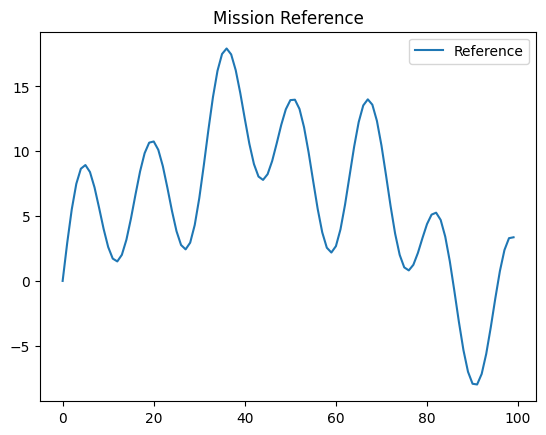

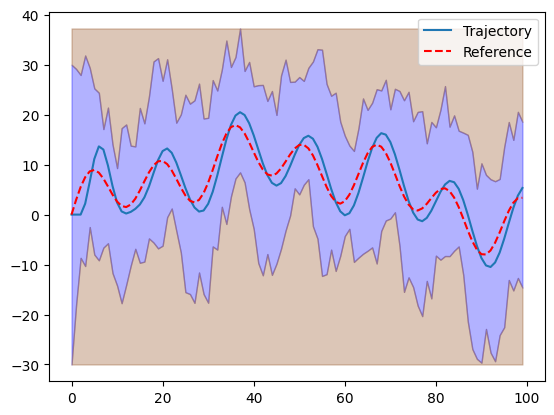

In [17]:
#zero-disturbance baseline (sanity check)

# Instantiate plant and PD controller
sub = Submarine()
ctl = PDController(kp=0.15, kd=0.6)
cl = ClosedLoop(sub, ctl)

# Simulate with zero disturbance
dist = np.zeros(len(m.reference))
traj = cl.simulate(mission=m, disturbances=dist)

# Plot reference for comparison
plt.figure()
plt.plot(m.reference, label="Reference")
plt.title("Mission Reference")
plt.legend()
plt.show()

# Plot the simulated trajectory
plt.figure()
traj.plot_completed_mission(m)



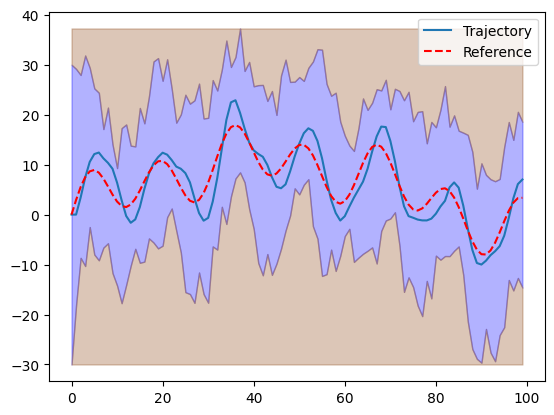

In [20]:
#random disturbances test
# variance controls disturbance size; start small and increase gradually
traj_rand = cl.simulate_with_random_disturbances(mission=m, variance=0.5)

# Visualize completed mission 
traj_rand.plot_completed_mission(m)



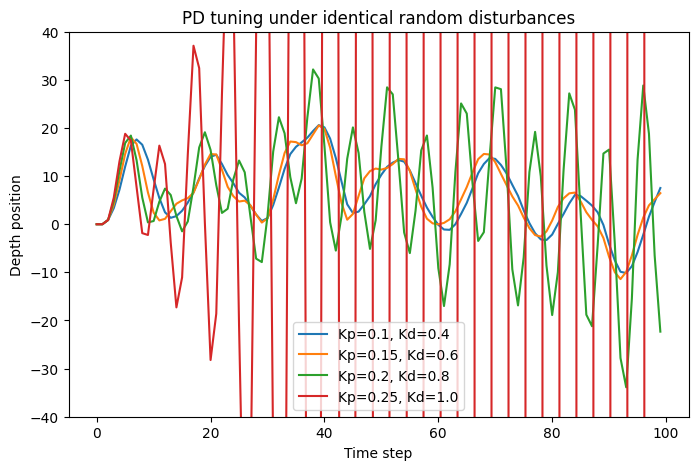

In [ ]:
#gain tuning helper 

# # Try different proportional/derivative gains to see response changes
gains = [(0.1, 0.4), (0.15, 0.6), (0.2, 0.8), (0.25, 1.0)]

plt.figure(figsize=(8, 5))
for Kp, Kd in gains:
    np.random.seed(0)  # same noise each trial (simulate_with_random_disturbances uses np.random)
    ctl = PDController(Kp, Kd)
    cl = ClosedLoop(Submarine(), ctl)
    traj = cl.simulate_with_random_disturbances(m, variance=0.5)
    plt.plot(traj.position[:, 1], label=f"Kp={Kp}, Kd={Kd}")

plt.gca().invert_yaxis()
plt.ylim(-40, 40)  # keep everything visible; widen/narrow as needed
plt.title("PD tuning under identical random disturbances")
plt.xlabel("Time step"); plt.ylabel("Depth position")
plt.legend()
plt.show()

